**Problem statment explanation**:-
Finance comapny deals in all loans The customer first applies for a home loan after that company validates the customer's eligibility for a loan.

Attributes present in our df:-

1)**loan_id**: This is a unique identifier for each loan in the dfset. It's a reference number or code assigned to distinguish one loan from another.

2)**no_of_dependents**: Represents the number of dependents (family members, children, etc.) that the loan applicant has. This information can be relevant in assessing the financial responsibilities of the applicant.

3)**Education**:Indicates the educational level of the loan applicant. This could include categories such as 'Graduate' or 'Not Graduate'. Education level may impact earning potential and, consequently, loan eligibility.

4)**self_employed**: A binary indicator (yes/no) representing whether the loan applicant is self-employed or not. Self-employment status can influence the stability of income and, therefore, impact loan approval.

5)**Income_annum**: This column likely represents the annual income of the loan applicant. It is a crucial factor in determining the borrower's capacity to repay the loan.

6)**loan_amount**: The amount of money requested by the applicant as a loan. This is the principal amount that the borrower is seeking.

7)**loan_term**:Represents the duration of the loan in terms of months or years. It defines the period over which the borrower will repay the loan.

8)**cibil_score**: CIBIL (Credit Information Bureau India Limited) score is a credit score that reflects an individual's creditworthiness. A higher score is generally associated with lower credit risk.

9)**residential_assets_value**:The value of the residential assets owned by the loan applicant. This could include the value of a house or other residential properties.

10)**commercial_assets_value**:Represents the value of any commercial assets owned by the loan applicant. This might include business properties or assets.

11)**luxury_assets_value**:Indicates the value of luxury assets owned by the applicant, such as high-end cars, jewelry, etc.

12)**bank_asset_value**:Represents the value of assets held in bank accounts by the loan applicant. This could include savings, fixed deposits, etc.

13)**loan_status**:This column likely indicates the status of the loan application or the outcome of the loan approval process. Common values may include 'Approved' or 'Rejected', indicating whether the loan was granted or not.

[ ]



In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
#chi-square test of independence
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import pandas as pd
import numpy as np

from IPython.display import Image
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier

from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
import graphviz


import warnings
warnings.filterwarnings('ignore')

## conda install -c anaconda statsmodels
import statsmodels.api as sm

get_ipython().run_line_magic('matplotlib', 'inline')
pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',125)

In [121]:
df = pd.read_csv(r"/content/loan_prediction.csv")
df.shape

(614, 13)

In [122]:
df = df.drop('Loan_ID', axis=1)

In [123]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [124]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [125]:
for i in df.columns:
  print("no of unique values and dtype:","|",i,"|",df[i].nunique(),"|",df[i].dtype)

no of unique values and dtype: | Gender | 2 | object
no of unique values and dtype: | Married | 2 | object
no of unique values and dtype: | Dependents | 4 | object
no of unique values and dtype: | Education | 2 | object
no of unique values and dtype: | Self_Employed | 2 | object
no of unique values and dtype: | ApplicantIncome | 505 | int64
no of unique values and dtype: | CoapplicantIncome | 287 | float64
no of unique values and dtype: | LoanAmount | 203 | float64
no of unique values and dtype: | Loan_Amount_Term | 10 | float64
no of unique values and dtype: | Credit_History | 2 | float64
no of unique values and dtype: | Property_Area | 3 | object
no of unique values and dtype: | Loan_Status | 2 | object


In [126]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [127]:
#Categorical Features
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [128]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [129]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [130]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# **Univariate** **analysis**

#We must have to delve into the dfset before finding out reasons for accepting the loan , lets try to see why banks are rejecting the loan for few people


In [131]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [132]:
import plotly.express as px

# Count the occurrences of 'Accepted' and 'Rejected'
status_counts = df['Loan_Status'].value_counts().reset_index()

# Create a bar chart
fig = px.bar(status_counts, x='index', y='Loan_Status', color='index',
             color_discrete_map={'Accepted': 'green', 'Rejected': 'red'},
             labels={'index': 'Loan Status', 'loan_status': 'Number of customers'},
             title='Loan Status Comparison')

# Show the plot
fig.show()


In [133]:
import plotly.graph_objects as go

# Create a function to generate individual plots
def generate_bar_plot(data, col_name):
    fig = go.Figure()
    fig.add_trace(go.Bar(x=data[col_name].value_counts().index,
                         y=data[col_name].value_counts().values,
                         marker_color='rgb(55, 83, 109)'))
    fig.update_layout(title=col_name, xaxis_title="Categories", yaxis_title="Count")
    fig.show()

# Generate individual plots for each categorical variable
generate_bar_plot(df, 'Gender')
generate_bar_plot(df, 'Married')
generate_bar_plot(df, 'Self_Employed')
generate_bar_plot(df, 'Credit_History')


It can be seen from the above bar plots that:

- 80% applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have repaid their debts.


In [134]:
import plotly.express as px

# Function to generate individual bar plots
def generate_bar_plotly(data, col_name, title):
    fig = px.bar(x=data[col_name].value_counts().index, y=data[col_name].value_counts().values,
                 labels={'x': col_name, 'y': 'Count'}, title=title)
    fig.show()

# Generate individual plots for each categorical variable
generate_bar_plotly(df, 'Dependents', 'Dependents')
generate_bar_plotly(df, 'Education', 'Education')
generate_bar_plotly(df, 'Property_Area', 'Property Area')


It can be seen from the above bar plots that:

- Most of the applicants don’t have any dependents.
- Around 80% of the applicants are Graduate.
- Most of the applicants are from Semiurban area.


__Visualize independent variable (Numeric Features)__

In [135]:
import plotly.express as px

# Box plot for ApplicantIncome
fig1 = px.box(data_frame=df, y='ApplicantIncome', title='ApplicantIncome')

# Box plot for CoapplicantIncome
fig2 = px.box(data_frame=df, y='CoapplicantIncome', title='CoapplicantIncome')

# Display the plots
fig1.show()
fig2.show()


ApplicantIncome and Education


In [136]:
import plotly.express as px

# Box plot for 'ApplicantIncome' grouped by 'Education'
fig = px.box(data_frame=df, x='Education', y='ApplicantIncome', title='ApplicantIncome by Education')

# Display the plot
fig.show()


- __2.2. Bivariate Analysis__


__Categorical Independent Variable vs Target Variable__


In [137]:
import plotly.express as px

# Create cross-tabulation
gender = pd.crosstab(df['Gender'], df['Loan_Status'])

# Normalize the values for each row to get proportions
gender_normalized = gender.div(gender.sum(1).astype(float), axis=0)

# Plot the stacked bar chart
fig = px.bar(gender_normalized, barmode='stack', labels={'value': 'Proportion', 'index': 'Gender', 'variable': 'Loan Status'})

# Display the plot
fig.show()


It can be seen that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

In [138]:
married = pd.crosstab(df['Married'], df['Loan_Status'])
dependents = pd.crosstab(df['Dependents'], df['Loan_Status'])
education = pd.crosstab(df['Education'], df['Loan_Status'])
self_employed = pd.crosstab(df['Self_Employed'], df['Loan_Status'])

In [139]:
import plotly.express as px

# Function to create stacked bar plots using Plotly Express
def plot_stacked_bar(data, title):
    fig = px.bar(data, barmode='stack', labels={'value': 'Proportion', 'index': title, 'variable': 'Loan Status'})
    fig.show()

# Plot for 'Married'
plot_stacked_bar(married.div(married.sum(1).astype(float), axis=0), 'Married')

# Plot for 'Dependents'
plot_stacked_bar(dependents.div(dependents.sum(1).astype(float), axis=0), 'Dependents')

# Plot for 'Education'
plot_stacked_bar(education.div(education.sum(1).astype(float), axis=0), 'Education')

# Plot for 'Self-Employed'
plot_stacked_bar(self_employed.div(self_employed.sum(1).astype(float), axis=0), 'Self-Employed')


- Proportion of married applicants is higher for the approved loans.
- Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
- There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

In [140]:
credit_history = pd.crosstab(df['Credit_History'], df['Loan_Status'])
property_area = pd.crosstab(df['Property_Area'], df['Loan_Status'])

In [141]:
import plotly.express as px

# Function to create stacked bar plots using Plotly Express
def plot_stacked_bar(data, title):
    fig = px.bar(data, barmode='stack', labels={'value': 'Proportion', 'index': title, 'variable': 'Loan Status'})
    fig.show()

# Plot for 'Credit_History'
plot_stacked_bar(credit_history.div(credit_history.sum(1).astype(float), axis=0), 'Credit History')

# Plot for 'Property_Area'
plot_stacked_bar(property_area.div(property_area.sum(1).astype(float), axis=0), 'Property Area')


- It seems people with credit history as 1 are more likely to get their loans approved.
- Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

__Numerical Independent Variable vs Target Variable__

- ApplicantIncome

In [142]:
px.bar(df.groupby('Loan_Status')['ApplicantIncome'].mean().reset_index(), x='Loan_Status', y='ApplicantIncome', title='Mean Applicant Income by Loan Status')


In [143]:
bins = [0,2500,4000,6000,81000]
group = ['Low', 'Average', 'High', 'Very High']

In [144]:
df['income_bin'] = pd.cut(df['ApplicantIncome'],bins, labels=group)
income_bin = pd.crosstab(df['income_bin'], df['Loan_Status'])
income_bin

Loan_Status,N,Y
income_bin,,
Low,34,74
Average,67,159
High,45,98
Very High,46,91


In [145]:
import plotly.express as px

# Plot the stacked bar chart using Plotly Express
fig = px.bar(income_bin.div(income_bin.sum(1).astype(float), axis=0), barmode='stack')

# Update axis labels
fig.update_xaxes(title='ApplicantIncome')
fig.update_yaxes(title='Percentage')

# Show the plot
fig.show()


It can be inferred that applicant income does not affect the chances of loan approval.

In [146]:
binsco = [0, 1000, 2000, 3000, 42000]
groupco = ['Low', 'Average', 'High', 'Very High']

In [147]:
df['coappincome_bin'] = pd.cut(df['CoapplicantIncome'],binsco, labels=groupco)
coappincome_bin = pd.crosstab(df['coappincome_bin'], df['Loan_Status'])
coappincome_bin

Loan_Status,N,Y
coappincome_bin,,
Low,3,19
Average,35,87
High,26,74
Very High,32,65


In [148]:
import plotly.express as px

# Plot the stacked bar chart using Plotly Express
fig = px.bar(coappincome_bin.div(coappincome_bin.sum(1).astype(float), axis=0), barmode='stack')

# Update axis labels
fig.update_xaxes(title='CoapplicantIncome')
fig.update_yaxes(title='Percentage')

# Show the plot
fig.show()


It shows that if coapplicant's income is less, the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don't have any coapplicant so the coapplicant income for such applicant is 0 and hence the loan approval is not dependent on it.

so we can make a new variable in which we will combine the applicant's and coapplicant's income to visualize the combined effect of income on loan approval.

In [149]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']


In [150]:
binstotal = [0,2500,4000,6000,81000]
grouptotal = ['Low', 'Average', 'High', 'Very High']

In [151]:
df['Total_Income_bin'] = pd.cut(df['Total_Income'], binstotal,labels=grouptotal)
Total_Income_bin =pd.crosstab(df['Total_Income_bin'],df['Loan_Status'])

In [152]:
import plotly.express as px

# Plot the stacked bar chart using Plotly Express
fig = px.bar(Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0), barmode='stack')

# Update axis labels
fig.update_xaxes(title='Total_Income')
fig.update_yaxes(title='Percentage')

# Show the plot
fig.show()



Proportion of loans getting approved for applicant having low Total_Income is verry less as compared to that applicant with average, high, and very high income.

In [153]:
import numpy as np

num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Total_Income']

df[num_cols]=df[num_cols].replace(0,1)
# List of numerical columns
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Total_Income']

# Apply np.log() with an offset to each numerical column
for column in numerical_columns:
    df[column + '_log'] = np.log(df[column])  # Adding a small positive offset (e.g., 1e-9)

# Display the DataFrame
print(df.head())

  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                1.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                1.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                1.0       141.0             360.0             1.0   

  Property_Area Loan_Status income_bin coappincome_bin  Total_Income  \
0         Urban           Y       High            

In [154]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,income_bin,coappincome_bin,Total_Income,EMI,Total_Income_bin,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,Male,No,0,Graduate,No,5849,1.0,128.0,360.0,1.0,Urban,Y,High,NaN,5849.0,0.355556,High,8.674026,0.000000,4.852030,5.886104,8.674026
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,0.355556,Very High,8.430109,7.318540,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,3000,1.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,0.183333,Average,8.006368,0.000000,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,High,4941.0,0.333333,High,7.856707,7.765569,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,6000,1.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,0.391667,High,8.699515,0.000000,4.948760,5.886104,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,1.0,71.0,360.0,1.0,Rural,Y,Average,NaN,2900.0,0.197222,Average,7.972466,0.000000,4.262680,5.886104,7.972466
610,Male,Yes,3+,Graduate,No,4106,1.0,40.0,180.0,1.0,Rural,Y,High,NaN,4106.0,0.222222,High,8.320205,0.000000,3.688879,5.192957,8.320205
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,Very High,Low,8312.0,0.702778,Very High,8.996157,5.480639,5.533389,5.886104,9.025456
612,Male,Yes,2,Graduate,No,7583,1.0,187.0,360.0,1.0,Urban,Y,Very High,NaN,7583.0,0.519444,Very High,8.933664,0.000000,5.231109,5.886104,8.933664


In [155]:
df = df.drop(['coappincome_bin', 'income_bin', 'Total_Income_bin'], axis=1)

In [156]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [157]:
df['Dependents'].replace('3+', 3, inplace=True)

In [158]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,Male,No,0,Graduate,No,5849,1.0,128.0,360.0,1.0,Urban,Y,5849.0,0.355556,8.674026,0.000000,4.852030,5.886104,8.674026
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0.355556,8.430109,7.318540,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,3000,1.0,66.0,360.0,1.0,Urban,Y,3000.0,0.183333,8.006368,0.000000,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0.333333,7.856707,7.765569,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,6000,1.0,141.0,360.0,1.0,Urban,Y,6000.0,0.391667,8.699515,0.000000,4.948760,5.886104,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,1.0,71.0,360.0,1.0,Rural,Y,2900.0,0.197222,7.972466,0.000000,4.262680,5.886104,7.972466
610,Male,Yes,3,Graduate,No,4106,1.0,40.0,180.0,1.0,Rural,Y,4106.0,0.222222,8.320205,0.000000,3.688879,5.192957,8.320205
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,0.702778,8.996157,5.480639,5.533389,5.886104,9.025456
612,Male,Yes,2,Graduate,No,7583,1.0,187.0,360.0,1.0,Urban,Y,7583.0,0.519444,8.933664,0.000000,5.231109,5.886104,8.933664


# Data Preprocessing

### __1. Label Encoder__


In [159]:
cat_cols=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
labelencoder = LabelEncoder()
for i in cat_cols:
    df[i]= df[i].astype('str')

for i in cat_cols:
    df[i] = labelencoder.fit_transform(df[i])
# df.dtypes
# le = LabelEncoder()
# data['Dependents']=le.fit_transform(data['Dependents'])

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,5849,1.0,128.0,360.0,1.0,2,1,5849.0,0.355556,8.674026,0.000000,4.852030,5.886104,8.674026
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0,0.355556,8.430109,7.318540,4.852030,5.886104,8.714568
2,1,1,0,0,1,3000,1.0,66.0,360.0,1.0,2,1,3000.0,0.183333,8.006368,0.000000,4.189655,5.886104,8.006368
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,0.333333,7.856707,7.765569,4.787492,5.886104,8.505323
4,1,0,0,0,0,6000,1.0,141.0,360.0,1.0,2,1,6000.0,0.391667,8.699515,0.000000,4.948760,5.886104,8.699515


### __2. Correlation__

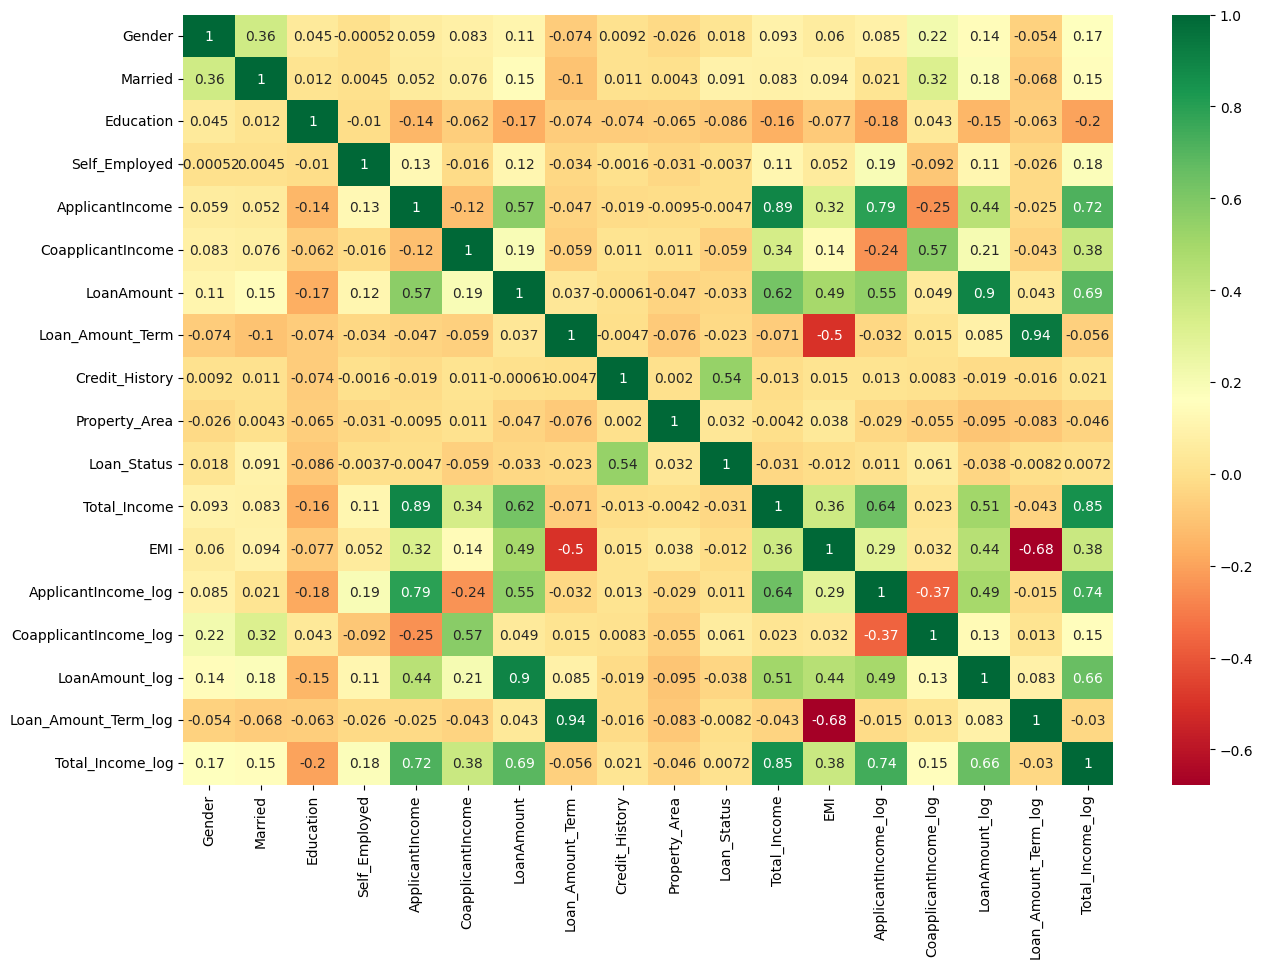

In [165]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")
plt.show()

The most correlated variables are (ApplicantIncome - LoanAmount) and (Loan_Status - Credit_History)

### __3. Standardization__


In [161]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,5849,1.0,128.0,360.0,1.0,2,1,5849.0,0.355556,8.674026,0.000000,4.852030,5.886104,8.674026
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0,0.355556,8.430109,7.318540,4.852030,5.886104,8.714568
2,1,1,0,0,1,3000,1.0,66.0,360.0,1.0,2,1,3000.0,0.183333,8.006368,0.000000,4.189655,5.886104,8.006368
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,0.333333,7.856707,7.765569,4.787492,5.886104,8.505323
4,1,0,0,0,0,6000,1.0,141.0,360.0,1.0,2,1,6000.0,0.391667,8.699515,0.000000,4.948760,5.886104,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,1.0,71.0,360.0,1.0,0,1,2900.0,0.197222,7.972466,0.000000,4.262680,5.886104,7.972466
610,1,1,3,0,0,4106,1.0,40.0,180.0,1.0,0,1,4106.0,0.222222,8.320205,0.000000,3.688879,5.192957,8.320205
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,8312.0,0.702778,8.996157,5.480639,5.533389,5.886104,9.025456
612,1,1,2,0,0,7583,1.0,187.0,360.0,1.0,2,1,7583.0,0.519444,8.933664,0.000000,5.231109,5.886104,8.933664


In [162]:
X = df.drop(['Loan_Status','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income'] ,axis=1)
y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log', 'Loan_Amount_Term_log', 'Credit_History']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [163]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,EMI,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
83,1,1,0,0,0,0.407763,1,0.736111,0.514998,0.890365,1.430587,0.275123,9.017968
90,1,1,0,0,0,0.407763,1,0.363889,-0.566489,0.955631,0.008635,0.275123,8.675564
227,1,1,2,0,0,0.407763,1,0.583333,0.577421,0.817521,0.961087,0.275123,8.980298
482,1,1,0,0,0,0.407763,1,0.355556,-1.102769,0.976898,-0.038123,0.275123,8.562740
464,1,0,0,0,0,-2.452404,1,0.272222,-0.042842,-1.094695,-0.577133,0.275123,8.334712


In [166]:
X_train.isnull().sum()

Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
Credit_History           0
Property_Area            0
EMI                      0
ApplicantIncome_log      0
CoapplicantIncome_log    0
LoanAmount_log           0
Loan_Amount_Term_log     0
Total_Income_log         0
dtype: int64

In [167]:
X_test.isnull().sum()

Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
Credit_History           0
Property_Area            0
EMI                      0
ApplicantIncome_log      0
CoapplicantIncome_log    0
LoanAmount_log           0
Loan_Amount_Term_log     0
Total_Income_log         0
dtype: int64

In [168]:
print('X_Train Size:', (X_train.shape))
print('X _test Size:', (X_test.shape))
print('Y_train Size:', (y_train.shape))
print('Y_test Size:', (y_test.shape))

X_Train Size: (491, 13)
X _test Size: (123, 13)
Y_train Size: (491,)
Y_test Size: (123,)


#Defining error metrics

In [170]:
# Function for Classification Report

def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

#defining error metrics
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted,average="macro")
    train_precision= precision_score(train_actual,train_predicted,average="macro")
    train_f1score  = f1_score(train_actual,train_predicted,average="macro")
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted,average="macro")
    test_precision= precision_score(test_actual,test_predicted,average="macro")
    test_f1score  = f1_score(test_actual,test_predicted,average="macro")
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

In [171]:
###**1)Naive bayes classifier**
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score
from sklearn import svm
NB1 =  GaussianNB()
NB1=NB1.fit(X_train, y_train)
y_pred_train =NB1.predict(X_train)
y_pred_train[0:10]
# Make predictions on the testing set and evaluate accuracy
y_pred_test = NB1.predict(X_test)
y_pred_test[0:10]
print("trainaccuracy",accuracy_score(y_train,y_pred_train))
print("testaccuracy",accuracy_score(y_test,y_pred_test))
print("recall-train",recall_score(y_train,y_pred_train,average='macro'))
print("recall-test",recall_score(y_test,y_pred_test,average='macro'))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"GaussianNB",scores)
scores

trainaccuracy 0.8187372708757638
testaccuracy 0.7804878048780488
recall-train 0.7164920130303387
recall-test 0.6968023255813953

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.8947    0.4564    0.6044       149
           1     0.8048    0.9766    0.8824       342

    accuracy                         0.8187       491
   macro avg     0.8498    0.7165    0.7434       491
weighted avg     0.8321    0.8187    0.7981       491


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.9000    0.4186    0.5714        43
           1     0.7573    0.9750    0.8525        80

    accuracy                      

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,GaussianNB,0.818737,0.716492,0.849778,0.743438,0.780488,0.696802,0.828641,0.711944


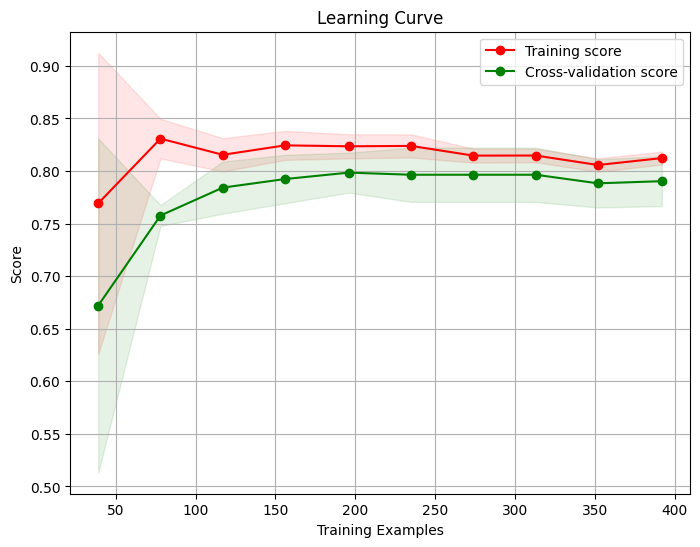

In [172]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
# Define the stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(NB1, X_train, y_train, cv=skf, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [173]:
###2)**Decision tree classifier**
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X=X_train, y= y_train)

y_pred_train = clf_dt.predict(X_train)
y_pred_test = clf_dt.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"Decisiontree",scores)
scores


Train Accuracy: 1.0
Test Accuracy: 0.7073170731707317

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       149
           1     1.0000    1.0000    1.0000       342

    accuracy                         1.0000       491
   macro avg     1.0000    1.0000    1.0000       491
weighted avg     1.0000    1.0000    1.0000       491


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.5854    0.5581    0.5714        43
           1     0.7683    0.7875    0.7778        80

    accuracy                         0.7073       123
   macro avg     0.6768    0.6728    0.6746       123


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,GaussianNB,0.818737,0.716492,0.849778,0.743438,0.780488,0.696802,0.828641,0.711944
1,Decisiontree,1.000000,1.000000,1.000000,1.000000,0.707317,0.672820,0.676829,0.674603


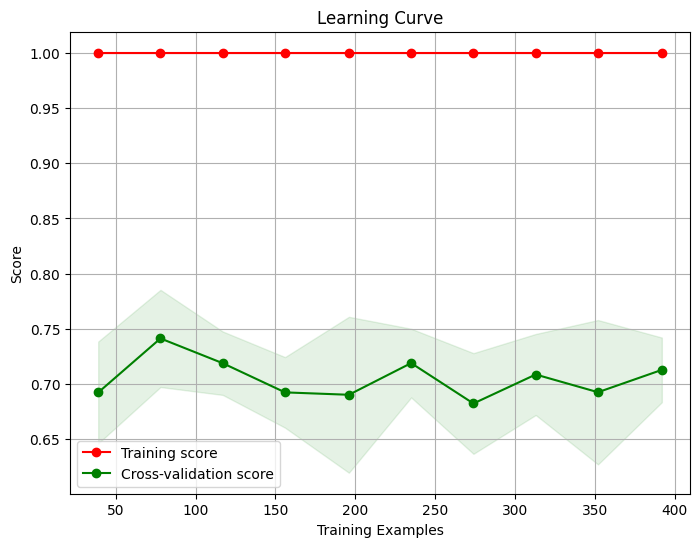

In [174]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf_dt, X_train, y_train, cv=skf, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

Train Accuracy: 1.0
Test Accuracy: 0.7804878048780488

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       149
           1     1.0000    1.0000    1.0000       342

    accuracy                         1.0000       491
   macro avg     1.0000    1.0000    1.0000       491
weighted avg     1.0000    1.0000    1.0000       491


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.8333    0.4651    0.5970        43
           1     0.7677    0.9500    0.8492        80

    accuracy                         0.7805       123
   macro avg     0.8005    0.7076    0.7231       123


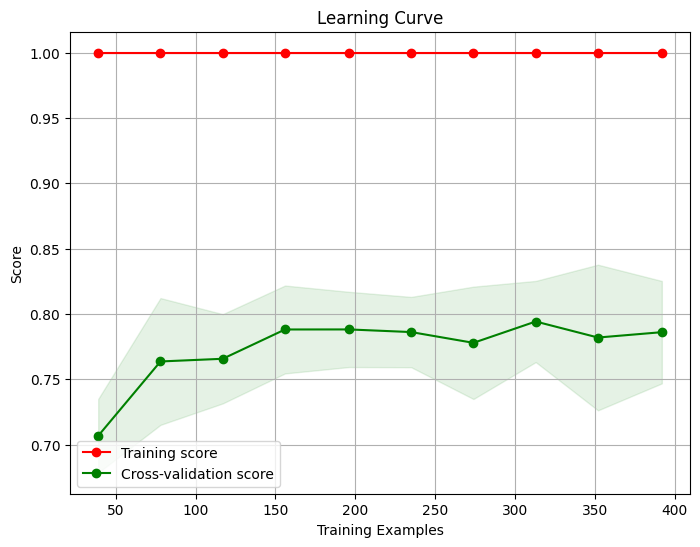

In [175]:
# Import Randomforest Library

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X=X_train, y= y_train)

y_pred_train = clf_rf.predict(X_train)
y_pred_test = clf_rf.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"randomforest",scores)
scores

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf_rf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [176]:
importances = clf_rf.feature_importances_
importances
np.argsort(importances)[::-1]
indices = np.argsort(importances)[::-1]
ind_attr_names = X_train.columns
pd.DataFrame([ind_attr_names[indices], np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Credit_History,Total_Income_log,ApplicantIncome_log,EMI,LoanAmount_log,CoapplicantIncome_log,Property_Area,Loan_Amount_Term_log,Dependents,Married,Gender,Education,Self_Employed
1,0.244638,0.147002,0.123334,0.121005,0.111901,0.07609,0.041492,0.0358,0.032423,0.019561,0.016912,0.015521,0.014321


In [177]:
from sklearn.svm import SVC
clf_svc = SVC()
clf_svc.fit(X=X_train, y= y_train)

y_pred_train = clf_svc.predict(X_train)
y_pred_test = clf_svc.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"SVMCLASSIFIER",scores)

Train Accuracy: 0.814663951120163
Test Accuracy: 0.7886178861788617

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.9143    0.4295    0.5845       149
           1     0.7981    0.9825    0.8807       342

    accuracy                         0.8147       491
   macro avg     0.8562    0.7060    0.7326       491
weighted avg     0.8334    0.8147    0.7908       491


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.9474    0.4186    0.5806        43
           1     0.7596    0.9875    0.8587        80

    accuracy                         0.7886       123
   macro avg     0.8535    0.7031    0.7

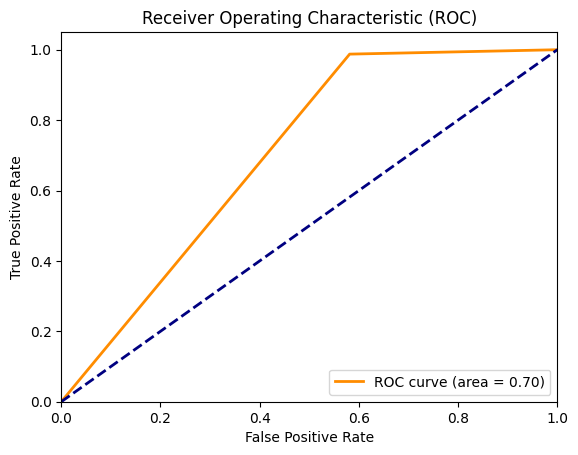

In [179]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate AUC
auc_score = roc_auc_score(y_test, y_pred_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
